<a href="https://colab.research.google.com/github/mkousal/MPA-MLF/blob/main/FinalProject/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final project

## Mounting GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Import libraries

In [ ]:
import glob, os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.backend import clear_session
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, Adadelta, Ftrl, Nadam, Adagrad, Adamax, Adam
import matplotlib.pyplot as plt

In [ ]:
# train_files = glob.glob('/content/drive/MyDrive/VUT/MPC-EKT/2.semestr/MPA-MLF/project2/Dataset/Train/CSV/*.csv')
# test_files = glob.glob('/content/drive/MyDrive/VUT/MPC-EKT/2.semestr/MPA-MLF/project2/Dataset/Test/CSV/*.csv')
# y_train_file = glob.glob('/content/drive/MyDrive/VUT/MPC-EKT/2.semestr/MPA-MLF/project2/Dataset/y_train.csv')

# x_train_files = []
# x_test_files = []
# for file_ in train_files:
#   df = pd.read_csv(file_, index_col=None, header=0)
#   x_train_files.append(df.to_numpy())

# for file_ in test_files:
#   df = pd.read_csv(file_, index_col=None, header=0)
#   x_test_files.append(df.to_numpy())

In [ ]:
# x_train = np.stack(x_train_files)
# x_test = np.stack(x_test_files)

## Import train and test data

In [ ]:
y_train = pd.read_csv('/content/drive/MyDrive/VUT/MPC-EKT/2.semestr/MPA-MLF/project2/Dataset/y_train.csv', index_col=None, header=0)
x_train = np.load('/content/drive/MyDrive/VUT/MPC-EKT/2.semestr/MPA-MLF/project2/x_train.npy')
x_test = np.load('/content/drive/MyDrive/VUT/MPC-EKT/2.semestr/MPA-MLF/project2/x_test.npy')

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)

In [ ]:
x_train.shape

(6623, 44, 52)

In [ ]:
x_train.min()

0.0

In [ ]:
x_train.max()

43007.0

## Scale data and perform one-hot encoding

In [ ]:
x_train_scaled = x_train.astype('float64') / x_train.max()
x_valid_scaled = x_valid.astype('float64') / x_test.max()
x_test_scaled = x_test.astype('float64') / x_test.max()

# x_train_scaled = ( x_train - x_train.mean() )/ ( x_train.max() - x_train.min() )
# x_valid_scaled = ( x_valid - x_valid.mean() )/ ( x_valid.max() - x_valid.min() )
# x_test_scaled = ( x_test - x_test.mean() )/ ( x_test.max() - x_test.min() )

y_train_encoded = to_categorical(y_train['target']-1, num_classes=3)
y_valid_encoded = to_categorical(y_valid['target']-1, num_classes=3)

## Build Sequential model and train

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(44, 52)))
model.add(Dense(2048, activation='tanh'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(2048, activation='tanh'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2288)              0         
                                                                 
 dense (Dense)               (None, 2048)              4687872   
                                                                 
 dense_1 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_2 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_3 (Dense)             (None, 4096)              8392704   
                                                                 
 dense_4 (Dense)             (None, 3)                 12291     
                                                                 
Total params: 21,485,571
Trainable params: 21,485,571
No

In [ ]:
optimizer = Adadelta(learning_rate = 0.1)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_scaled, y_train_encoded, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
83/83 [==============================] - 1s 13ms/step - loss: 0.0715 - accuracy: 0.9777 - val_loss: 0.2106 - val_accuracy: 0.9366
Epoch 2/50
83/83 [==============================] - 1s 11ms/step - loss: 0.0739 - accuracy: 0.9781 - val_loss: 0.2067 - val_accuracy: 0.9351
Epoch 3/50
83/83 [==============================] - 1s 12ms/step - loss: 0.0629 - accuracy: 0.9824 - val_loss: 0.1918 - val_accuracy: 0.9381
Epoch 4/50
83/83 [==============================] - 1s 11ms/step - loss: 0.0698 - accuracy: 0.9783 - val_loss: 0.2367 - val_accuracy: 0.9321
Epoch 5/50
83/83 [==============================] - 1s 10ms/step - loss: 0.0637 - accuracy: 0.9777 - val_loss: 0.1935 - val_accuracy: 0.9351
Epoch 6/50
83/83 [==============================] - 1s 10ms/step - loss: 0.0478 - accuracy: 0.9883 - val_loss: 0.2702 - val_accuracy: 0.9147
Epoch 7/50
83/83 [==============================] - 1s 10ms/step - loss: 0.0570 - accuracy: 0.9804 - val_loss: 0.2150 - val_accuracy: 0.9321
Epoch 8/50
83

## Evaluate model

In [ ]:
score = model.evaluate(x_valid_scaled, y_valid_encoded, verbose=0)
print("Test loss: ", score[0])
print(f"Test accuracy: {score[1]*100} %")

Test loss:  0.18399213254451752
Test accuracy: 93.90096664428711 %


In [ ]:
clear_session()

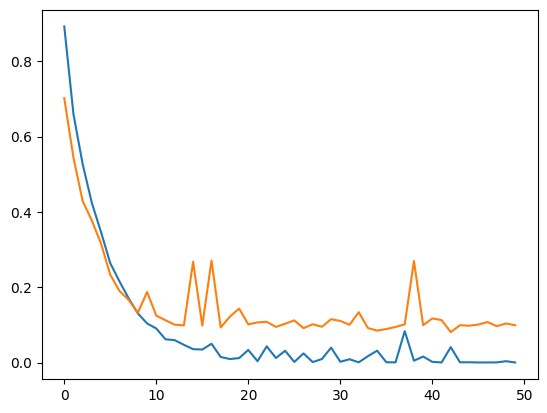

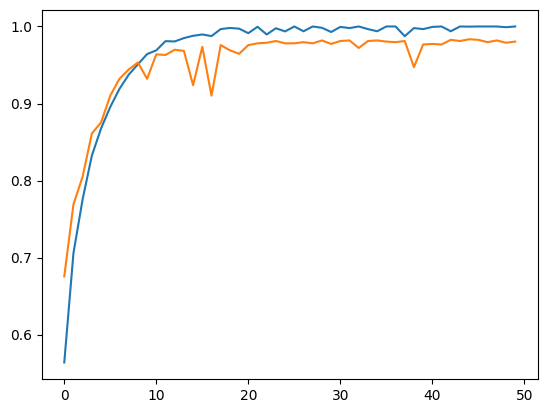

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

## Predict values

In [ ]:
predictions = model.predict(x_test_scaled)
predictions

111/111 [==============================] - 0s 3ms/step


array([[8.5865051e-02, 7.0994329e-01, 2.0419163e-01],
       [5.1559612e-12, 1.0000000e+00, 1.5024749e-12],
       [9.9997127e-01, 2.7697026e-05, 1.0718010e-06],
       ...,
       [9.9999964e-01, 3.3296760e-07, 2.1528787e-10],
       [1.0000000e+00, 1.5842643e-17, 1.4984918e-11],
       [9.9984491e-01, 1.7923529e-05, 1.3722848e-04]], dtype=float32)

In [ ]:
res = pd.DataFrame(predictions, columns=['1','2','3'])
results = pd.DataFrame(res.idxmax(axis=1), columns=['target'])
results.insert(0, 'id', range(0,3549))
# results.drop(columns=results.columns[0], axis=1, inplace=True)
results.columns = ['id', 'target']
results

,id,target
0,0,2
1,1,2
2,2,1
3,3,3
4,4,3
...,...,...
3544,3544,1
3545,3545,2
3546,3546,1
3547,3547,1


In [ ]:
from google.colab import files
results[['id', 'target']].to_csv('output.csv', index=False)
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Try tuner for finging optimal model structure

In [ ]:
!pip install -q -U keras-tuner
import keras_tuner as kt

In [ ]:
def build_model(hp):
  model = Sequential()
  model.add(Flatten(input_shape=(44, 52)))

  for i in range(hp.Int('num_layers', min_value=1, max_value=12)):
    model.add(Dense(units=hp.Int('units' + str(i), min_value=32, max_value=2048, step=64), 
                    activation=hp.Choice('activation_' + str(i), values=['relu', 'tanh', 'sigmoid', 'gelu', 'elu'])))
    model.add(Dropout(hp.Float('dropout_' + str(i), min_value=0.0, max_value=0.5, step=0.1)))

  model.add(Dense(3, activation='softmax'))

  optimizer = Adadelta(hp.Choice('learning_rate', values=[1.0, 0.1, 0.01]))

  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  return model

tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=50,
    factor=4
)

tuner.search(x_train_scaled, y_train_encoded, epochs=50, validation_split=0.2)

Trial 44 Complete [00h 00m 46s]
val_accuracy: 0.9641509652137756

Best val_accuracy So Far: 0.9641509652137756
Total elapsed time: 00h 10m 38s


In [ ]:
# Get the best set of hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model using the best hyperparameters
model = tuner.hypermodel.build(best_hps)

# Train the model using the best hyperparameters
history = model.fit(x_train_scaled, y_train_encoded, epochs=20, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_valid_scaled, y_valid_encoded)

print('Test accuracy:', test_acc)

Epoch 1/20
133/133 [==============================] - 3s 16ms/step - loss: 1.0432 - accuracy: 0.4601 - val_loss: 1.3439 - val_accuracy: 0.4500
Epoch 2/20
133/133 [==============================] - 2s 14ms/step - loss: 0.9224 - accuracy: 0.5380 - val_loss: 0.7746 - val_accuracy: 0.6085
Epoch 3/20
133/133 [==============================] - 1s 9ms/step - loss: 0.7900 - accuracy: 0.6298 - val_loss: 0.6654 - val_accuracy: 0.7066
Epoch 4/20
133/133 [==============================] - 1s 10ms/step - loss: 0.6803 - accuracy: 0.7034 - val_loss: 1.0480 - val_accuracy: 0.5292
Epoch 5/20
133/133 [==============================] - 1s 9ms/step - loss: 0.6031 - accuracy: 0.7412 - val_loss: 0.8659 - val_accuracy: 0.5868
Epoch 6/20
133/133 [==============================] - 1s 9ms/step - loss: 0.5221 - accuracy: 0.7817 - val_loss: 0.5047 - val_accuracy: 0.7840
Epoch 7/20
133/133 [==============================] - 1s 8ms/step - loss: 0.4391 - accuracy: 0.8259 - val_loss: 0.5455 - val_accuracy: 0.7896
Epo

## Create CNN model with 2D convolution

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=(44,52,1)),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(512, activation="tanh"),
        layers.Dense(2048, activation="relu"),
        layers.Dense(3, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 42, 50, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 21, 25, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 19, 23, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 9, 11, 32)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 9, 64)          18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 4, 64)        

In [ ]:
optimizer = SGD(learning_rate = 0.1)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
history = model.fit(x_train_scaled, y_train_encoded, batch_size=64, epochs=50, validation_split=0.2)

Epoch 1/50
83/83 [==============================] - 1s 13ms/step - loss: 0.1140 - accuracy: 0.9585 - val_loss: 0.1081 - val_accuracy: 0.9623
Epoch 2/50
83/83 [==============================] - 1s 6ms/step - loss: 0.1056 - accuracy: 0.9606 - val_loss: 0.1163 - val_accuracy: 0.9577
Epoch 3/50
83/83 [==============================] - 1s 6ms/step - loss: 0.1041 - accuracy: 0.9619 - val_loss: 0.1007 - val_accuracy: 0.9698
Epoch 4/50
83/83 [==============================] - 0s 5ms/step - loss: 0.1059 - accuracy: 0.9602 - val_loss: 0.1530 - val_accuracy: 0.9547
Epoch 5/50
83/83 [==============================] - 0s 5ms/step - loss: 0.1206 - accuracy: 0.9545 - val_loss: 0.1017 - val_accuracy: 0.9721
Epoch 6/50
83/83 [==============================] - 0s 5ms/step - loss: 0.0982 - accuracy: 0.9662 - val_loss: 0.3599 - val_accuracy: 0.8725
Epoch 7/50
83/83 [==============================] - 0s 5ms/step - loss: 0.1187 - accuracy: 0.9587 - val_loss: 0.1325 - val_accuracy: 0.9570
Epoch 8/50
83/83 [=

## Evaluate model

In [ ]:
score = model.evaluate(x_valid_scaled, y_valid_encoded)
print('Test score:', score[0])
print('Test accuracy:', score[1])

52/52 [==============================] - 0s 3ms/step - loss: 0.1083 - accuracy: 0.9662
Test score: 0.10830500721931458
Test accuracy: 0.966183602809906


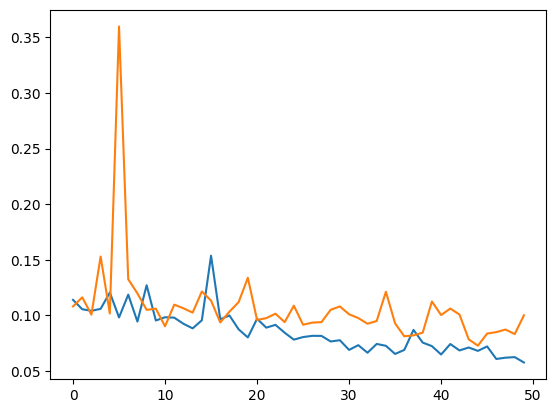

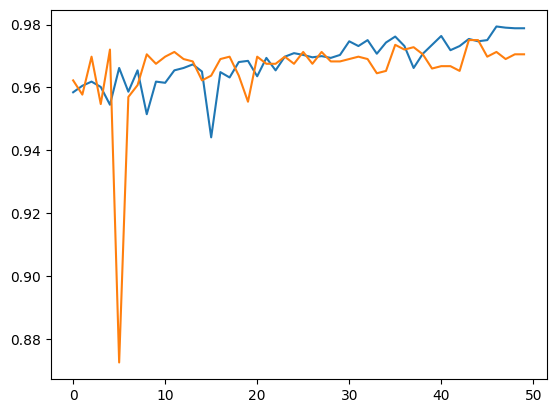

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
clear_session()